In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('january_weather_energy_data_2020_2025.csv')

# Convert 'timestamp' to datetime and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['day'] = df['timestamp'].dt.day

# Features and target variable
X = df[['temperature_C', 'humidity_%', 'wind_speed_mps', 'is_sunny', 'cloud_cover_%', 'solar_irradiance_Wm2', 'air_density_kgm3', 'precipitation_mm', 'runoff_coefficient', 'hour', 'minute', 'day']]
y = df['energy_consumed_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)



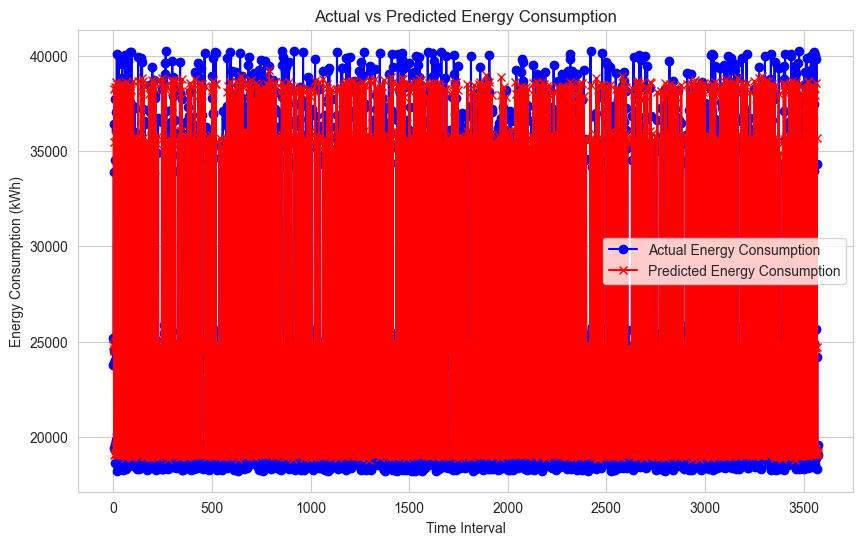

R² Score: 0.9898
Mean Squared Error: 572769.3799


In [42]:
# Plotting Actual vs Predicted Energy Consumption
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Energy Consumption', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Energy Consumption', color='red', marker='x')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time Interval')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()

# Print R² and MSE
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')